In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('final_clean_0131.csv')

In [3]:
df

Unnamed: 0  year  NUM_INTERESTED_PROP  OWN_VAC_HOME  PROP_VAL  \
0                0  2019                    0             0         0   
1                1  2019                    0             0         0   
2                2  2019                    0             0         0   
3                3  2019                    0             0         0   
4                4  2019                    0             0         0   
...            ...   ...                  ...           ...       ...   
265860      265860  1989                    0             0         0   
265861      265861  1989                    0             0         0   
265862      265862  1989                    0             0         0   
265863      265863  1989                    0             0         0   
265864      265864  1989                    0             0         0   

        PROP_PURCHASE_PRICE  GIFT_INHERIT  RECIVED_NI  OUTSTND_LOAN_VAC_HOME  \
0                         0             0           0                      0   
1                         0             0           0                      0   
2                         0             0           0                      0   
3                         0             0           0                      0   
4                         0             0           0                      0   
...                     ...           ...         ...                    ...   
265860                    0             0           0                      0   
265861                    0             0           0                      0   
265862                    0             0           0                      0   
265863                    0             0           0                      0   
265864                    0             0           0                      0   

        OWE_AMOUNT  ...  MORT2  MORT3  KIDS  HHSEX  INDCAT  \
0                0  ...    0.0    0.0     0      2       2   
1                0  ...    0.0    0.0     0      2       2   
2                0  ...    0.0    0.0     0      2       2   
3                0  ...    0.0    0.0     0      2       2   
4                0  ...    0.0    0.0     0      2       2   
...            ...  ...    ...    ...   ...    ...     ...   
265860           0  ...    0.0    0.0     3      1       1   
265861           0  ...    0.0    0.0     3      1       1   
265862           0  ...    0.0    0.0     3      1       1   
265863           0  ...    0.0    0.0     3      1       1   
265864           0  ...    0.0    0.0     3      1       1   

                   EDUC_CLEAN  marriage_clean  ONE_PERC  MULTICLASS  EDUC  
0             Bachelor degree               0       0.0     Top 10%   3.0  
1             Bachelor degree               0       0.0     Top 10%   3.0  
2             Bachelor degree               0       0.0     Top 10%   3.0  
3             Bachelor degree               0       0.0     Top 10%   3.0  
4             Bachelor degree               0       0.0     Top 10%   3.0  
...                       ...             ...       ...         ...   ...  
265860  No Highschool Diploma               2       0.0    Rest 80%   0.0  
265861  No Highschool Diploma               2       0.0    Rest 80%   0.0  
265862  No Highschool Diploma               2       0.0    Rest 80%   0.0  
265863  No Highschool Diploma               2       0.0    Rest 80%   0.0  
265864  No Highschool Diploma               2       0.0    Rest 80%   0.0  

[265865 rows x 38 columns]

In [4]:
df.dtypes

Unnamed: 0                 int64
year                       int64
NUM_INTERESTED_PROP        int64
OWN_VAC_HOME               int64
PROP_VAL                   int64
PROP_PURCHASE_PRICE        int64
GIFT_INHERIT               int64
RECIVED_NI                 int64
OUTSTND_LOAN_VAC_HOME      int64
OWE_AMOUNT                 int64
PAYMT                      int64
PAYMT_FREQ                 int64
PROP_WORTH                 int64
PROP_PURCH_PRICE         float64
MORT_OUTSTND_PROP          int64
OWE_MORT                   int64
PAY_MORT                   int64
PAY_MORT_FREQ              int64
NETWORTH                 float64
NWCAT                      int64
NWPCTLECAT                 int64
AGE                        int64
ORESRE                   float64
NNRESRE                  float64
FAMSTRUCT                  int64
RACECL4                    int64
HOUSES                   float64
MORT1                    float64
MORT2                    float64
MORT3                    float64
KIDS      

In [126]:
df.HOUSES.value_counts()

0.000000e+00    79845
2.196340e+05      582
1.767373e+05      582
3.294511e+05      559
3.534746e+05      555
                ...  
4.901514e+05        1
1.402116e+06        1
3.098794e+06        1
5.690941e+06        1
4.216581e+05        1
Name: HOUSES, Length: 11619, dtype: int64

In [5]:
df.ONE_PERC.value_counts()

0.0    230504
1.0     35361
Name: ONE_PERC, dtype: int64

In [50]:
df1=df[['year', 'NUM_INTERESTED_PROP', 'OWN_VAC_HOME', 'PROP_VAL',
       'PROP_PURCHASE_PRICE', 'GIFT_INHERIT', 'RECIVED_NI',
       'OUTSTND_LOAN_VAC_HOME', 'OWE_AMOUNT', 'PAYMT', 'PAYMT_FREQ',
       'PROP_WORTH', 'PROP_PURCH_PRICE', 'MORT_OUTSTND_PROP', 'OWE_MORT','ONE_PERC','MULTICLASS']]
df1

year  NUM_INTERESTED_PROP  OWN_VAC_HOME  PROP_VAL  \
0       2019                    0             0         0   
1       2019                    0             0         0   
2       2019                    0             0         0   
3       2019                    0             0         0   
4       2019                    0             0         0   
...      ...                  ...           ...       ...   
265860  1989                    0             0         0   
265861  1989                    0             0         0   
265862  1989                    0             0         0   
265863  1989                    0             0         0   
265864  1989                    0             0         0   

        PROP_PURCHASE_PRICE  GIFT_INHERIT  RECIVED_NI  OUTSTND_LOAN_VAC_HOME  \
0                         0             0           0                      0   
1                         0             0           0                      0   
2                         0             0           0                      0   
3                         0             0           0                      0   
4                         0             0           0                      0   
...                     ...           ...         ...                    ...   
265860                    0             0           0                      0   
265861                    0             0           0                      0   
265862                    0             0           0                      0   
265863                    0             0           0                      0   
265864                    0             0           0                      0   

        OWE_AMOUNT  PAYMT  PAYMT_FREQ  PROP_WORTH  PROP_PURCH_PRICE  \
0                0      0           0           0               0.0   
1                0      0           0           0               0.0   
2                0      0           0           0               0.0   
3                0      0           0           0               0.0   
4                0      0           0           0               0.0   
...            ...    ...         ...         ...               ...   
265860           0      0           0           0               0.0   
265861           0      0           0           0               0.0   
265862           0      0           0           0               0.0   
265863           0      0           0           0               0.0   
265864           0      0           0           0               0.0   

        MORT_OUTSTND_PROP  OWE_MORT  ONE_PERC MULTICLASS  
0                       0         0       0.0    Top 10%  
1                       0         0       0.0    Top 10%  
2                       0         0       0.0    Top 10%  
3                       0         0       0.0    Top 10%  
4                       0         0       0.0    Top 10%  
...                   ...       ...       ...        ...  
265860                  0         0       0.0   Rest 80%  
265861                  0         0       0.0   Rest 80%  
265862                  0         0       0.0   Rest 80%  
265863                  0         0       0.0   Rest 80%  
265864                  0         0       0.0   Rest 80%  

[265865 rows x 17 columns]

In [51]:
df1.describe()

year  NUM_INTERESTED_PROP   OWN_VAC_HOME      PROP_VAL  \
count  265865.000000        265865.000000  265865.000000  2.658650e+05   
mean     2005.782126             0.751731       0.219122  2.903338e+04   
std         9.270509             2.840608       0.982866  6.714939e+05   
min      1989.000000             0.000000       0.000000 -1.000000e+00   
25%      1998.000000             0.000000       0.000000  0.000000e+00   
50%      2007.000000             0.000000       0.000000  0.000000e+00   
75%      2013.000000             1.000000       0.000000  0.000000e+00   
max      2019.000000           350.000000       5.000000  8.000000e+07   

       PROP_PURCHASE_PRICE   GIFT_INHERIT     RECIVED_NI  \
count         2.658650e+05  265865.000000  265865.000000   
mean          2.089267e+04       0.097591      79.390254   
std           4.660685e+05       0.688516    2976.122106   
min           0.000000e+00       0.000000  -15000.000000   
25%           0.000000e+00       0.000000       0.000000   
50%           0.000000e+00       0.000000       0.000000   
75%           0.000000e+00       0.000000       0.000000   
max           5.418000e+07       5.000000  300000.000000   

       OUTSTND_LOAN_VAC_HOME    OWE_AMOUNT         PAYMT     PAYMT_FREQ  \
count          265865.000000  2.658650e+05  2.658650e+05  265865.000000   
mean                0.085404  2.290426e+03  5.956789e+01       0.016696   
std                 0.634952  9.935381e+04  8.495812e+03       0.262766   
min                 0.000000  0.000000e+00 -1.000000e+00      -1.000000   
25%                 0.000000  0.000000e+00  0.000000e+00       0.000000   
50%                 0.000000  0.000000e+00  0.000000e+00       0.000000   
75%                 0.000000  0.000000e+00  0.000000e+00       0.000000   
max                 5.000000  1.300000e+07  1.950000e+06       6.000000   

         PROP_WORTH  PROP_PURCH_PRICE  MORT_OUTSTND_PROP      OWE_MORT  \
count  2.658650e+05      2.658650e+05      265865.000000  2.658650e+05   
mean   2.121956e+05      1.278094e+05           0.163602  7.616914e+04   
std    7.976115e+06      7.261489e+06           0.846971  3.765566e+06   
min   -1.000000e+00     -1.000000e+00           0.000000  0.000000e+00   
25%    0.000000e+00      0.000000e+00           0.000000  0.000000e+00   
50%    0.000000e+00      0.000000e+00           0.000000  0.000000e+00   
75%    0.000000e+00      0.000000e+00           0.000000  0.000000e+00   
max    2.000000e+09      2.730000e+09           5.000000  6.000000e+08   

            ONE_PERC  
count  265865.000000  
mean        0.133004  
std         0.339579  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [52]:
df1[df1.ONE_PERC==0].describe()

year  NUM_INTERESTED_PROP   OWN_VAC_HOME      PROP_VAL  \
count  230504.000000        230504.000000  230504.000000  2.305040e+05   
mean     2005.957359             0.407290       0.107933  1.216307e+03   
std         9.265115             1.185466       0.707175  3.091080e+04   
min      1989.000000             0.000000       0.000000 -1.000000e+00   
25%      1998.000000             0.000000       0.000000  0.000000e+00   
50%      2007.000000             0.000000       0.000000  0.000000e+00   
75%      2013.000000             0.000000       0.000000  0.000000e+00   
max      2019.000000            70.000000       5.000000  3.000000e+06   

       PROP_PURCHASE_PRICE   GIFT_INHERIT     RECIVED_NI  \
count         2.305040e+05  230504.000000  230504.000000   
mean          8.894413e+02       0.033062       9.345586   
std           2.344083e+04       0.402964     491.705742   
min           0.000000e+00       0.000000      -1.000000   
25%           0.000000e+00       0.000000       0.000000   
50%           0.000000e+00       0.000000       0.000000   
75%           0.000000e+00       0.000000       0.000000   
max           2.500000e+06       5.000000   60000.000000   

       OUTSTND_LOAN_VAC_HOME    OWE_AMOUNT          PAYMT     PAYMT_FREQ  \
count          230504.000000  2.305040e+05  230504.000000  230504.000000   
mean                0.028308  2.315397e+02       3.534928       0.006529   
std                 0.366255  1.027960e+04     343.887634       0.162613   
min                 0.000000  0.000000e+00      -1.000000      -1.000000   
25%                 0.000000  0.000000e+00       0.000000       0.000000   
50%                 0.000000  0.000000e+00       0.000000       0.000000   
75%                 0.000000  0.000000e+00       0.000000       0.000000   
max                 5.000000  2.140000e+06   72000.000000       6.000000   

         PROP_WORTH  PROP_PURCH_PRICE  MORT_OUTSTND_PROP      OWE_MORT  \
count  2.305040e+05      2.305040e+05      230504.000000  2.305040e+05   
mean   1.016118e+04      6.840024e+03           0.075348  4.989484e+03   
std    1.684116e+05      1.630113e+05           0.578795  2.743309e+05   
min   -1.000000e+00     -1.000000e+00           0.000000  0.000000e+00   
25%    0.000000e+00      0.000000e+00           0.000000  0.000000e+00   
50%    0.000000e+00      0.000000e+00           0.000000  0.000000e+00   
75%    0.000000e+00      0.000000e+00           0.000000  0.000000e+00   
max    2.736400e+07      2.734000e+07           5.000000  6.100000e+07   

       ONE_PERC  
count  230504.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0

In [53]:
df1[df1.ONE_PERC==1].describe()

year  NUM_INTERESTED_PROP  OWN_VAC_HOME      PROP_VAL  \
count  35361.000000         35361.000000  35361.000000  3.536100e+04   
mean    2004.639857             2.997002      0.943921  2.103616e+05   
std        9.224510             6.759708      1.843202  1.829233e+06   
min     1989.000000             0.000000      0.000000  0.000000e+00   
25%     1998.000000             1.000000      0.000000  0.000000e+00   
50%     2004.000000             2.000000      0.000000  0.000000e+00   
75%     2013.000000             3.000000      1.000000  0.000000e+00   
max     2019.000000           350.000000      5.000000  8.000000e+07   

       PROP_PURCHASE_PRICE  GIFT_INHERIT     RECIVED_NI  \
count         3.536100e+04  35361.000000   35361.000000   
mean          1.512856e+05      0.518226     535.983004   
std           1.268872e+06      1.517139    8048.575183   
min           0.000000e+00      0.000000  -15000.000000   
25%           0.000000e+00      0.000000       0.000000   
50%           0.000000e+00      0.000000       0.000000   
75%           0.000000e+00      0.000000       0.000000   
max           5.418000e+07      5.000000  300000.000000   

       OUTSTND_LOAN_VAC_HOME    OWE_AMOUNT         PAYMT    PAYMT_FREQ  \
count           35361.000000  3.536100e+04  3.536100e+04  35361.000000   
mean                0.457595  1.571147e+04  4.248240e+02      0.082973   
std                 1.413180  2.707815e+05  2.327599e+04      0.584552   
min                 0.000000  0.000000e+00 -1.000000e+00     -1.000000   
25%                 0.000000  0.000000e+00  0.000000e+00      0.000000   
50%                 0.000000  0.000000e+00  0.000000e+00      0.000000   
75%                 0.000000  0.000000e+00  0.000000e+00      0.000000   
max                 5.000000  1.300000e+07  1.950000e+06      6.000000   

         PROP_WORTH  PROP_PURCH_PRICE  MORT_OUTSTND_PROP      OWE_MORT  \
count  3.536100e+04      3.536100e+04       35361.000000  3.536100e+04   
mean   1.529176e+06      9.163593e+05           0.738893  5.401604e+05   
std    2.182080e+07      1.988891e+07           1.681700  1.028948e+07   
min   -1.000000e+00     -1.000000e+00           0.000000  0.000000e+00   
25%    0.000000e+00      0.000000e+00           0.000000  0.000000e+00   
50%    0.000000e+00      0.000000e+00           0.000000  0.000000e+00   
75%    0.000000e+00      0.000000e+00           0.000000  0.000000e+00   
max    2.000000e+09      2.730000e+09           5.000000  6.000000e+08   

       ONE_PERC  
count   35361.0  
mean        1.0  
std         0.0  
min         1.0  
25%         1.0  
50%         1.0  
75%         1.0  
max         1.0

In [84]:
df.PROP_VAL.value_counts()

0          260443
100000        178
1000000       176
500000        158
300000        149
            ...  
7920000         1
7230000         1
7730000         1
7630000         1
488000          1
Name: PROP_VAL, Length: 483, dtype: int64

In [87]:
df.loc[df.MULTICLASS=='Top 1%'].PROP_VAL.value_counts(ascending=True)

488000         1
7960000        1
8030000        1
8710000        1
346000         1
           ...  
300000       115
100000       117
500000       142
1000000      168
0          31548
Name: PROP_VAL, Length: 424, dtype: int64

In [78]:
df1.MULTICLASS.value_counts()

Rest 80%    188464
Top 1%       35361
Top 5%       25597
Top 10%      16443
Name: MULTICLASS, dtype: int64

In [79]:
df1[df1.MULTICLASS=='Top 1%'].describe()

year  NUM_INTERESTED_PROP  OWN_VAC_HOME      PROP_VAL  \
count  35361.000000         35361.000000  35361.000000  3.536100e+04   
mean    2004.639857             2.997002      0.943921  2.103616e+05   
std        9.224510             6.759708      1.843202  1.829233e+06   
min     1989.000000             0.000000      0.000000  0.000000e+00   
25%     1998.000000             1.000000      0.000000  0.000000e+00   
50%     2004.000000             2.000000      0.000000  0.000000e+00   
75%     2013.000000             3.000000      1.000000  0.000000e+00   
max     2019.000000           350.000000      5.000000  8.000000e+07   

       PROP_PURCHASE_PRICE  GIFT_INHERIT     RECIVED_NI  \
count         3.536100e+04  35361.000000   35361.000000   
mean          1.512856e+05      0.518226     535.983004   
std           1.268872e+06      1.517139    8048.575183   
min           0.000000e+00      0.000000  -15000.000000   
25%           0.000000e+00      0.000000       0.000000   
50%           0.000000e+00      0.000000       0.000000   
75%           0.000000e+00      0.000000       0.000000   
max           5.418000e+07      5.000000  300000.000000   

       OUTSTND_LOAN_VAC_HOME    OWE_AMOUNT         PAYMT    PAYMT_FREQ  \
count           35361.000000  3.536100e+04  3.536100e+04  35361.000000   
mean                0.457595  1.571147e+04  4.248240e+02      0.082973   
std                 1.413180  2.707815e+05  2.327599e+04      0.584552   
min                 0.000000  0.000000e+00 -1.000000e+00     -1.000000   
25%                 0.000000  0.000000e+00  0.000000e+00      0.000000   
50%                 0.000000  0.000000e+00  0.000000e+00      0.000000   
75%                 0.000000  0.000000e+00  0.000000e+00      0.000000   
max                 5.000000  1.300000e+07  1.950000e+06      6.000000   

         PROP_WORTH  PROP_PURCH_PRICE  MORT_OUTSTND_PROP      OWE_MORT  \
count  3.536100e+04      3.536100e+04       35361.000000  3.536100e+04   
mean   1.529176e+06      9.163593e+05           0.738893  5.401604e+05   
std    2.182080e+07      1.988891e+07           1.681700  1.028948e+07   
min   -1.000000e+00     -1.000000e+00           0.000000  0.000000e+00   
25%    0.000000e+00      0.000000e+00           0.000000  0.000000e+00   
50%    0.000000e+00      0.000000e+00           0.000000  0.000000e+00   
75%    0.000000e+00      0.000000e+00           0.000000  0.000000e+00   
max    2.000000e+09      2.730000e+09           5.000000  6.000000e+08   

       ONE_PERC  
count   35361.0  
mean        1.0  
std         0.0  
min         1.0  
25%         1.0  
50%         1.0  
75%         1.0  
max         1.0

In [80]:
df1[df1.MULTICLASS=='Top 5%'].describe()

year  NUM_INTERESTED_PROP  OWN_VAC_HOME      PROP_VAL  \
count  25597.000000         25597.000000  25597.000000  2.559700e+04   
mean    2004.722897             1.521702      0.531976  9.306567e+03   
std        9.307259             2.287757      1.491931  8.987589e+04   
min     1989.000000             0.000000      0.000000 -1.000000e+00   
25%     1998.000000             0.000000      0.000000  0.000000e+00   
50%     2004.000000             1.000000      0.000000  0.000000e+00   
75%     2013.000000             2.000000      0.000000  0.000000e+00   
max     2019.000000            23.000000      5.000000  3.000000e+06   

       PROP_PURCHASE_PRICE  GIFT_INHERIT    RECIVED_NI  OUTSTND_LOAN_VAC_HOME  \
count         2.559700e+04  25597.000000  25597.000000           25597.000000   
mean          6.657633e+03      0.178888     71.066922               0.151541   
std           6.744514e+04      0.923294   1429.340054               0.835117   
min           0.000000e+00      0.000000     -1.000000               0.000000   
25%           0.000000e+00      0.000000      0.000000               0.000000   
50%           0.000000e+00      0.000000      0.000000               0.000000   
75%           0.000000e+00      0.000000      0.000000               0.000000   
max           2.500000e+06      5.000000  60000.000000               5.000000   

         OWE_AMOUNT         PAYMT    PAYMT_FREQ    PROP_WORTH  \
count  2.559700e+04  25597.000000  25597.000000  2.559700e+04   
mean   1.596386e+03     26.682424      0.037739  6.715402e+04   
std    2.764379e+04   1023.735382      0.389719  3.584584e+05   
min    0.000000e+00      0.000000      0.000000 -1.000000e+00   
25%    0.000000e+00      0.000000      0.000000  0.000000e+00   
50%    0.000000e+00      0.000000      0.000000  0.000000e+00   
75%    0.000000e+00      0.000000      0.000000  0.000000e+00   
max    2.140000e+06  72000.000000      6.000000  8.000000e+06   

       PROP_PURCH_PRICE  MORT_OUTSTND_PROP      OWE_MORT  ONE_PERC  
count      2.559700e+04       25597.000000  2.559700e+04   25597.0  
mean       4.052044e+04           0.369731  1.816431e+04       0.0  
std        2.377316e+05           1.232232  1.572444e+05       0.0  
min       -1.000000e+00           0.000000  0.000000e+00       0.0  
25%        0.000000e+00           0.000000  0.000000e+00       0.0  
50%        0.000000e+00           0.000000  0.000000e+00       0.0  
75%        0.000000e+00           0.000000  0.000000e+00       0.0  
max        6.610000e+06           5.000000  5.570000e+06       0.0

In [81]:
df1[df1.MULTICLASS=='Top 10%'].describe()

year  NUM_INTERESTED_PROP  OWN_VAC_HOME      PROP_VAL  \
count  16443.000000         16443.000000  16443.000000  1.644300e+04   
mean    2005.468345             0.969774      0.289242  1.491911e+03   
std        9.432235             1.499259      1.134447  2.291907e+04   
min     1989.000000             0.000000      0.000000  0.000000e+00   
25%     1998.000000             0.000000      0.000000  0.000000e+00   
50%     2007.000000             1.000000      0.000000  0.000000e+00   
75%     2013.000000             1.000000      0.000000  0.000000e+00   
max     2019.000000            20.000000      5.000000  1.200000e+06   

       PROP_PURCHASE_PRICE  GIFT_INHERIT    RECIVED_NI  OUTSTND_LOAN_VAC_HOME  \
count         1.644300e+04  16443.000000  16443.000000           16443.000000   
mean          1.184799e+03      0.090677      8.076081               0.077297   
std           1.925425e+04      0.664302    287.960115               0.602712   
min           0.000000e+00      0.000000     -1.000000               0.000000   
25%           0.000000e+00      0.000000      0.000000               0.000000   
50%           0.000000e+00      0.000000      0.000000               0.000000   
75%           0.000000e+00      0.000000      0.000000               0.000000   
max           1.030000e+06      5.000000  14000.000000               5.000000   

          OWE_AMOUNT         PAYMT    PAYMT_FREQ    PROP_WORTH  \
count   16443.000000  16443.000000  16443.000000  1.644300e+04   
mean      348.058140      3.350362      0.017272  1.555799e+04   
std     10442.023261     83.147299      0.262284  1.225995e+05   
min         0.000000      0.000000      0.000000 -1.000000e+00   
25%         0.000000      0.000000      0.000000  0.000000e+00   
50%         0.000000      0.000000      0.000000  0.000000e+00   
75%         0.000000      0.000000      0.000000  0.000000e+00   
max    593000.000000   4500.000000      4.000000  3.950000e+06   

       PROP_PURCH_PRICE  MORT_OUTSTND_PROP      OWE_MORT  ONE_PERC  
count      1.644300e+04       16443.000000  1.644300e+04   16443.0  
mean       1.082838e+04           0.195889  6.028178e+03       0.0  
std        1.046480e+05           0.921108  8.790268e+04       0.0  
min        0.000000e+00           0.000000  0.000000e+00       0.0  
25%        0.000000e+00           0.000000  0.000000e+00       0.0  
50%        0.000000e+00           0.000000  0.000000e+00       0.0  
75%        0.000000e+00           0.000000  0.000000e+00       0.0  
max        3.890000e+06           5.000000  4.110000e+06       0.0

In [82]:
df1[df1.MULTICLASS=='Rest 80%'].describe()

year  NUM_INTERESTED_PROP   OWN_VAC_HOME       PROP_VAL  \
count  188464.000000        188464.000000  188464.000000  188464.000000   
mean     2006.167687             0.206856       0.034521      93.450235   
std         9.229966             0.758569       0.405450    3945.154965   
min      1989.000000             0.000000       0.000000       0.000000   
25%      1998.000000             0.000000       0.000000       0.000000   
50%      2007.000000             0.000000       0.000000       0.000000   
75%      2013.000000             0.000000       0.000000       0.000000   
max      2019.000000            70.000000       5.000000  625000.000000   

       PROP_PURCHASE_PRICE   GIFT_INHERIT     RECIVED_NI  \
count        188464.000000  188464.000000  188464.000000   
mean             80.241850       0.008230       1.073415   
std            4088.806792       0.201318     102.057305   
min               0.000000       0.000000       0.000000   
25%               0.000000       0.000000       0.000000   
50%               0.000000       0.000000       0.000000   
75%               0.000000       0.000000       0.000000   
max          693000.000000       5.000000   15000.000000   

       OUTSTND_LOAN_VAC_HOME     OWE_AMOUNT          PAYMT     PAYMT_FREQ  \
count          188464.000000  188464.000000  188464.000000  188464.000000   
mean                0.007296      36.001571       0.407160       0.001353   
std                 0.186923    3956.023366      40.180871       0.074451   
min                 0.000000       0.000000      -1.000000      -1.000000   
25%                 0.000000       0.000000       0.000000       0.000000   
50%                 0.000000       0.000000       0.000000       0.000000   
75%                 0.000000       0.000000       0.000000       0.000000   
max                 5.000000  717000.000000    7600.000000       4.000000   

         PROP_WORTH  PROP_PURCH_PRICE  MORT_OUTSTND_PROP      OWE_MORT  \
count  1.884640e+05      1.884640e+05      188464.000000  1.884640e+05   
mean   1.949612e+03      1.917608e+03           0.024848  3.109469e+03   
std    1.241598e+05      1.539135e+05           0.337496  2.966235e+05   
min    0.000000e+00     -1.000000e+00           0.000000  0.000000e+00   
25%    0.000000e+00      0.000000e+00           0.000000  0.000000e+00   
50%    0.000000e+00      0.000000e+00           0.000000  0.000000e+00   
75%    0.000000e+00      0.000000e+00           0.000000  0.000000e+00   
max    2.736400e+07      2.734000e+07           5.000000  6.100000e+07   

       ONE_PERC  
count  188464.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0

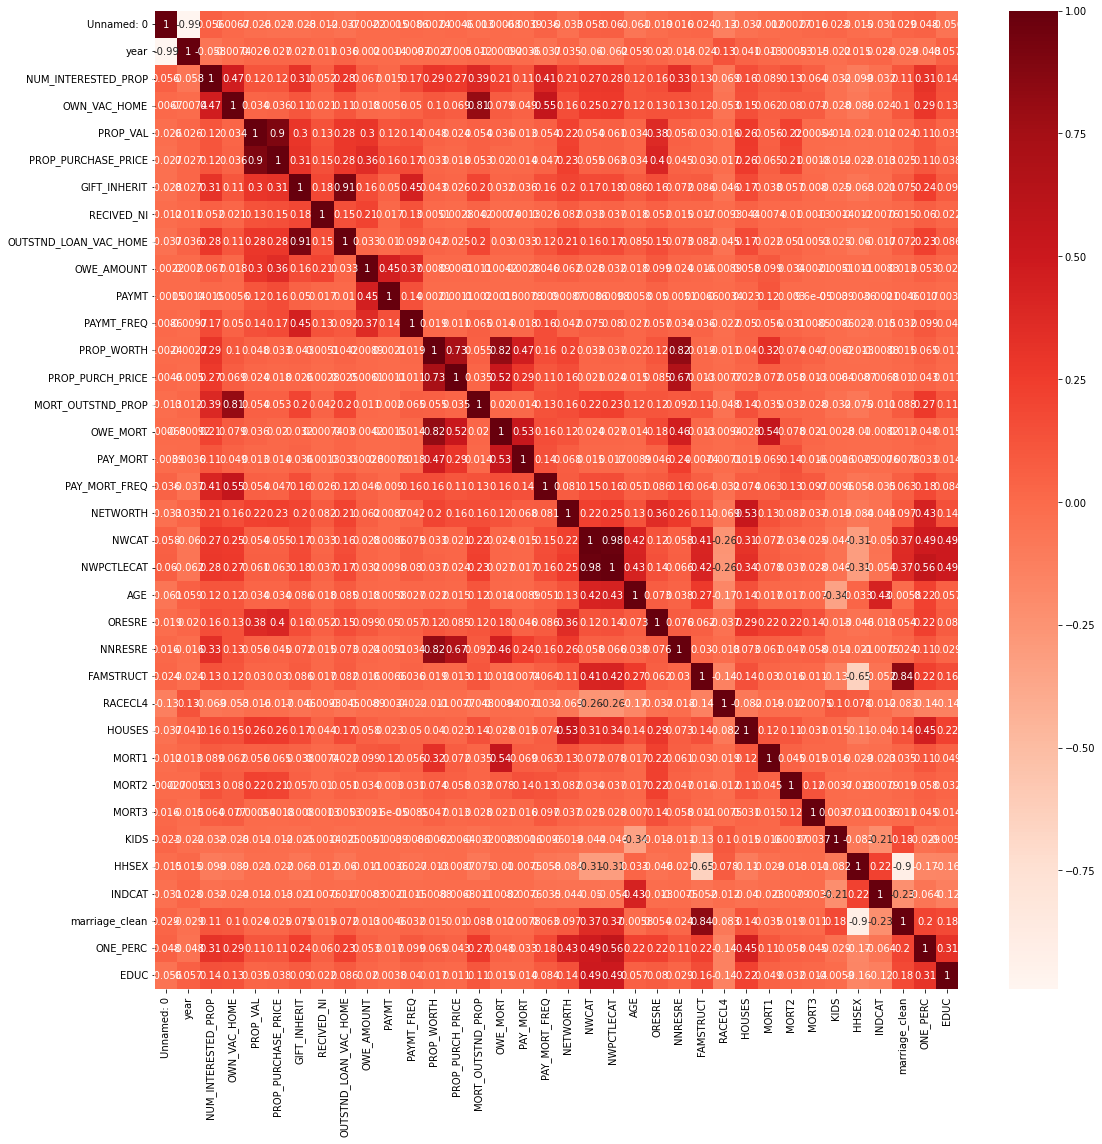

In [54]:
# Creating a matrix using age, salry, balance as rows and columns
df.corr()

#plot the correlation matrix of salary, balance and age in data dataframe.
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, cmap = 'Reds')
plt.show()

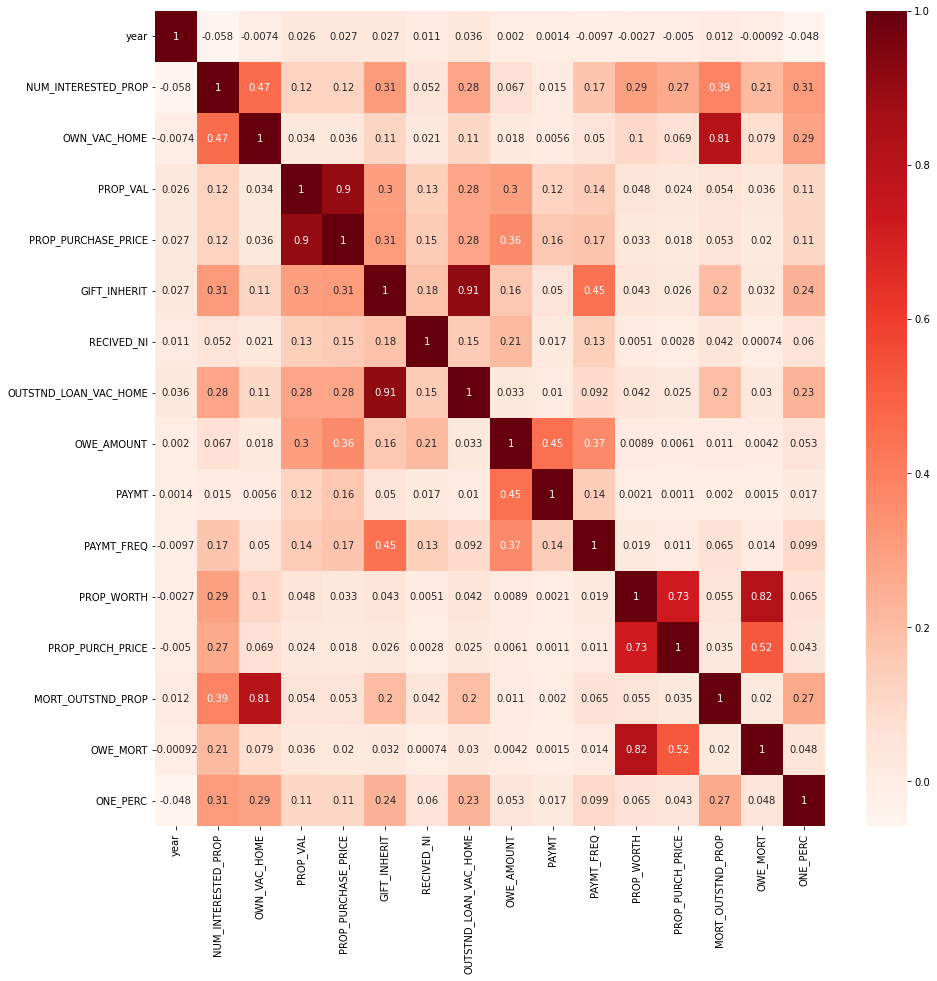

In [55]:
# Creating a matrix using age, salry, balance as rows and columns
df1.corr()

#plot the correlation matrix of salary, balance and age in data dataframe.
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(), annot=True, cmap = 'Reds')
plt.show()

In [99]:
df1.OWE_MORT.value_counts()

0         260954
400000       107
500000        86
250000        81
50000         75
           ...  
392000         1
397000         1
361000         1
487000         1
611000         1
Name: OWE_MORT, Length: 1267, dtype: int64

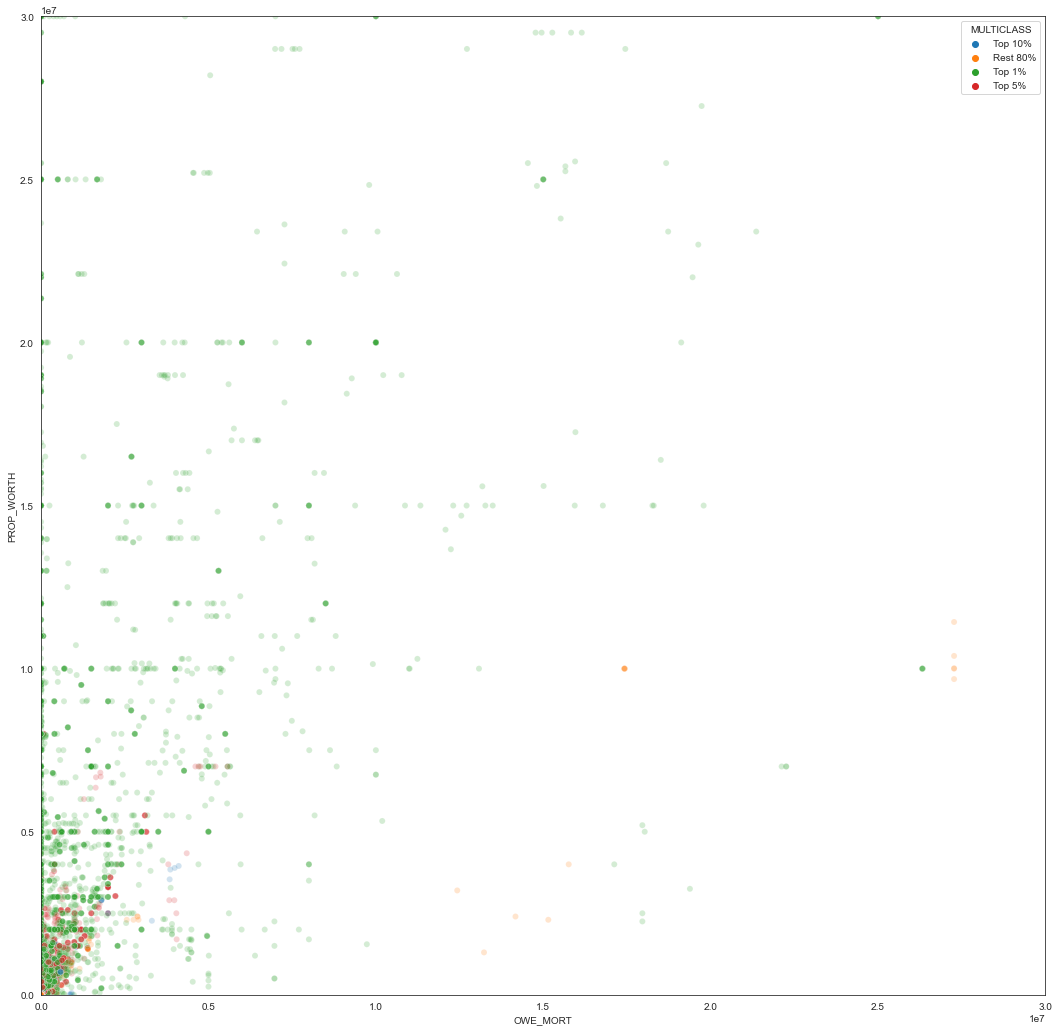

In [113]:
plt.figure(figsize=(18,18))
sns.scatterplot(data=df1, x="OWE_MORT", y="PROP_WORTH", hue="MULTICLASS",alpha=0.2)
plt.xlim(0, 30000000)
plt.ylim(0, 30000000)
plt.show()

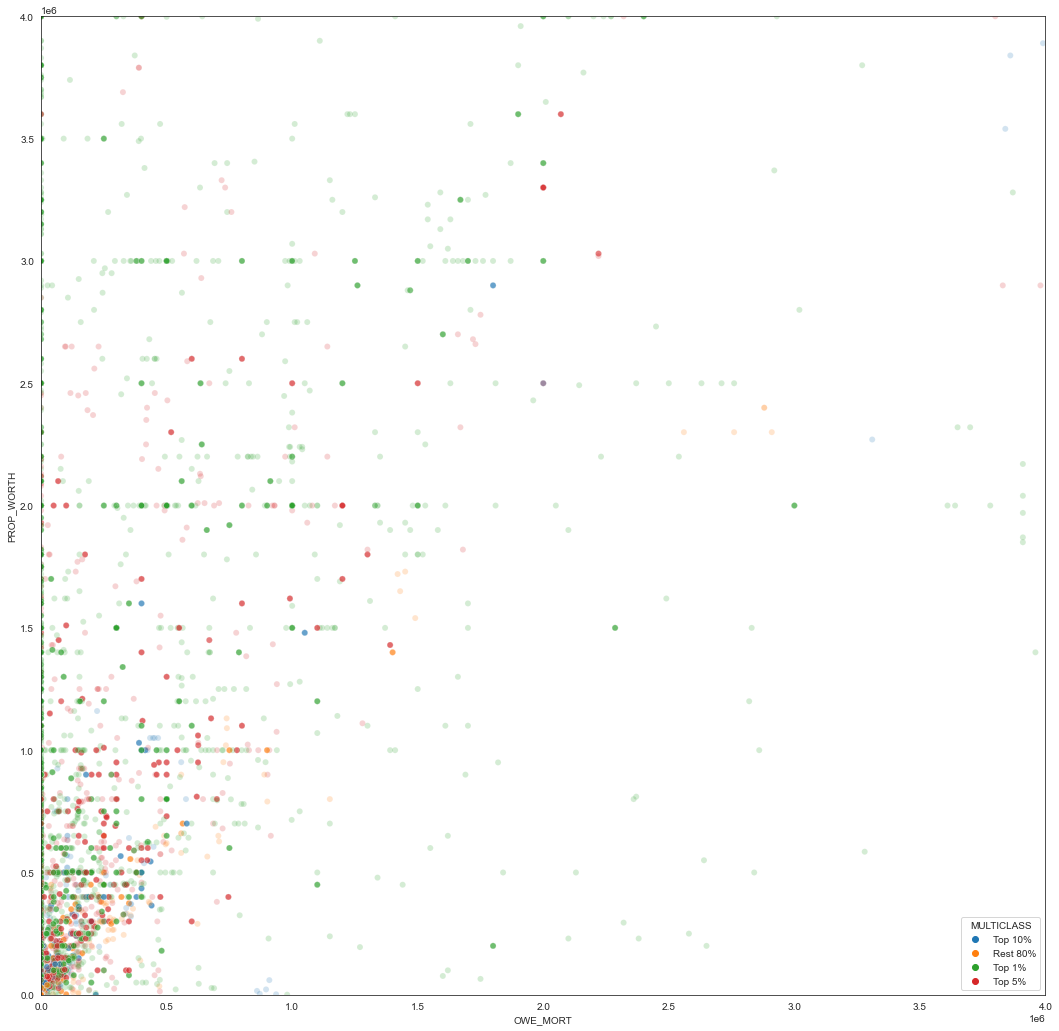

In [116]:
plt.figure(figsize=(18,18))
sns.scatterplot(data=df1, x="OWE_MORT", y="PROP_WORTH", hue="MULTICLASS",alpha=0.2)
plt.xlim(0, 4000000)
plt.ylim(0, 4000000)
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


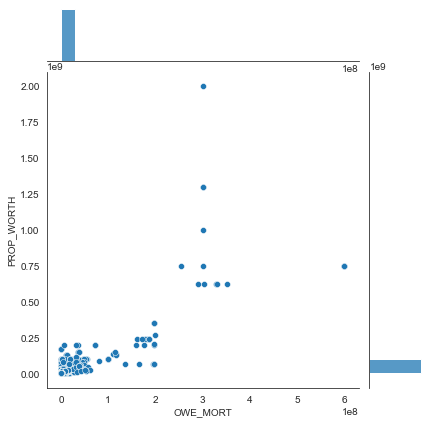

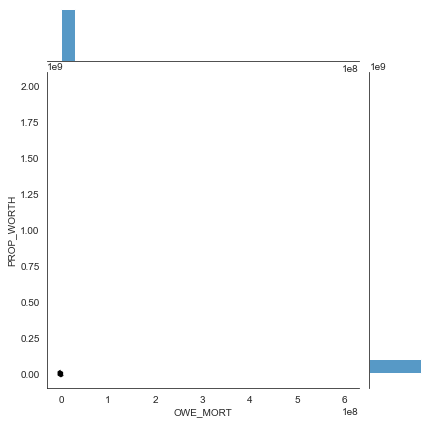

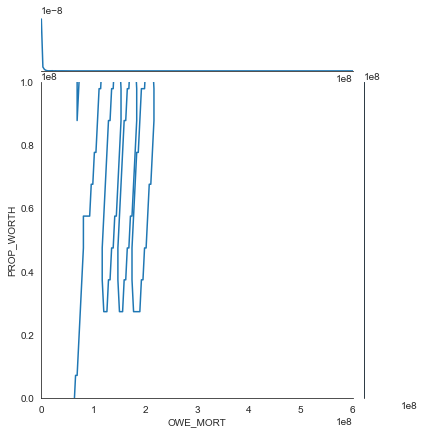

In [118]:
sns.jointplot(x=df["OWE_MORT"], y=df["PROP_WORTH"], kind='scatter')
sns.jointplot(x=df["OWE_MORT"], y=df["PROP_WORTH"], kind='hex')
sns.jointplot(x=df["OWE_MORT"], y=df["PROP_WORTH"], kind='kde')
plt.xlim(0, 100000000)
plt.ylim(0, 100000000)
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


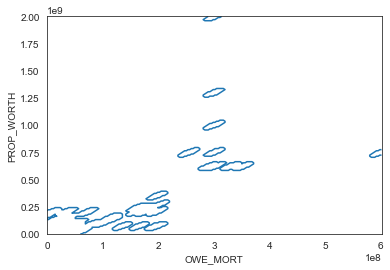

In [117]:
# set seaborn style
sns.set_style("white")

# Basic 2D density plot
sns.kdeplot(x=df1.OWE_MORT, y=df1.PROP_WORTH)
plt.show()
 
# # Custom the color, add shade and bandwidth
# sns.kdeplot(x=df1.OWE_MORT, y=df1.PROP_WORTH, cmap="Reds")
# plt.show()

# # Add thresh parameter
# sns.kdeplot(x=df1.OWE_MORT, y=df1.PROP_WORTH, cmap="Blues")
# plt.show()

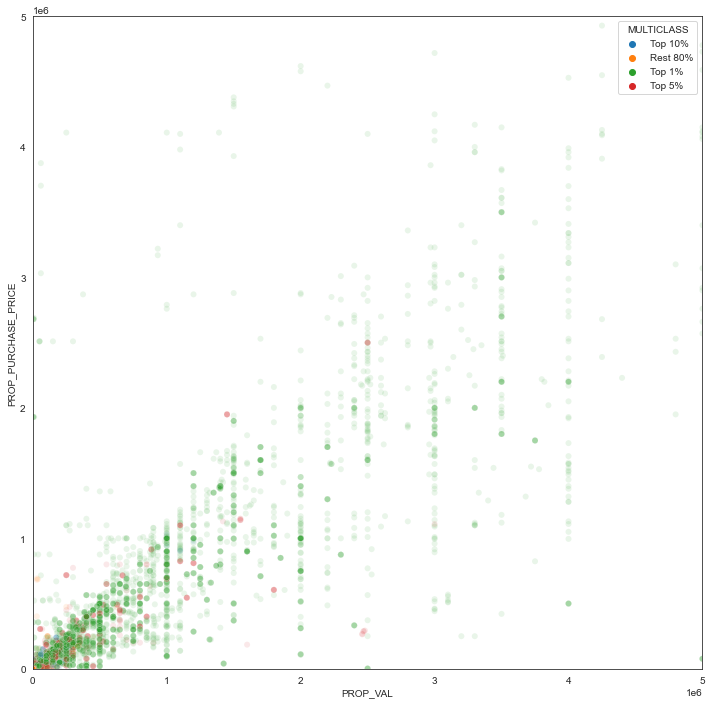

In [125]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df1, x="PROP_VAL", y="PROP_PURCHASE_PRICE", hue="MULTICLASS",alpha=0.1)
plt.xlim(0, 5000000)
plt.ylim(0, 5000000)
plt.show()

In [56]:
sns.pairplot(data = df1, vars=['NUM_INTERESTED_PROP', 'OWN_VAC_HOME', 'PROP_VAL',
       'PROP_PURCHASE_PRICE', 'GIFT_INHERIT','ONE_PERC'])
plt.show()

In [57]:
df1.GIFT_INHERIT.value_counts()

0    260443
5      5131
1       291
Name: GIFT_INHERIT, dtype: int64

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


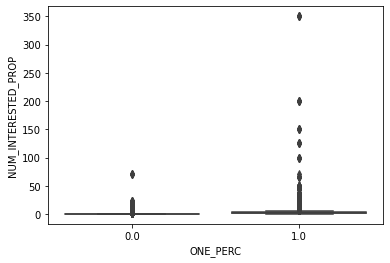

In [58]:
sns.boxplot(df1.ONE_PERC, df1.NUM_INTERESTED_PROP)
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


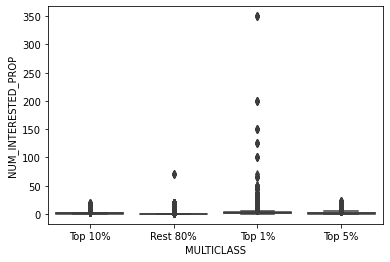

In [77]:
sns.boxplot(df1.MULTICLASS, df1.NUM_INTERESTED_PROP)
plt.show()

In [59]:
df1[df1.ONE_PERC==0].NUM_INTERESTED_PROP.describe()

count    230504.000000
mean          0.407290
std           1.185466
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          70.000000
Name: NUM_INTERESTED_PROP, dtype: float64

In [60]:
df1[df1.ONE_PERC==1].NUM_INTERESTED_PROP.describe()

count    35361.000000
mean         2.997002
std          6.759708
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        350.000000
Name: NUM_INTERESTED_PROP, dtype: float64

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


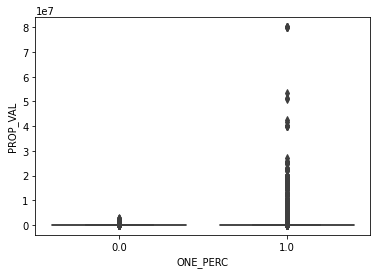

In [61]:
sns.boxplot(df1.ONE_PERC, df1.PROP_VAL)
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


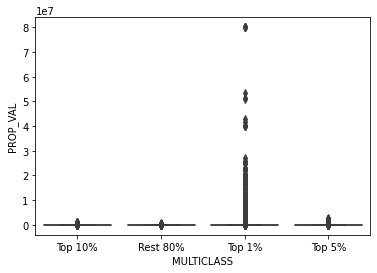

In [89]:
sns.boxplot(df1.MULTICLASS, df1.PROP_VAL)
plt.show()

In [62]:
df1[df1.ONE_PERC==0].PROP_VAL.describe()

count    2.305040e+05
mean     1.216307e+03
std      3.091080e+04
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+06
Name: PROP_VAL, dtype: float64

In [63]:
df1[df1.ONE_PERC==1].PROP_VAL.describe()

count    3.536100e+04
mean     2.103616e+05
std      1.829233e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.000000e+07
Name: PROP_VAL, dtype: float64

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


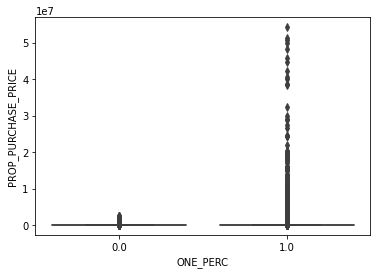

In [64]:
sns.boxplot(df1.ONE_PERC, df1.PROP_PURCHASE_PRICE)
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


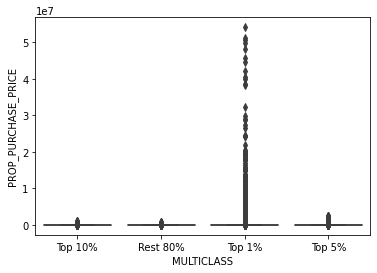

In [90]:
sns.boxplot(df1.MULTICLASS, df1.PROP_PURCHASE_PRICE)
plt.show()

In [65]:
df1[df1.ONE_PERC==0].PROP_PURCHASE_PRICE.describe()

count    2.305040e+05
mean     8.894413e+02
std      2.344083e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.500000e+06
Name: PROP_PURCHASE_PRICE, dtype: float64

In [66]:
df1[df1.ONE_PERC==1].PROP_PURCHASE_PRICE.describe()

count    3.536100e+04
mean     1.512856e+05
std      1.268872e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.418000e+07
Name: PROP_PURCHASE_PRICE, dtype: float64

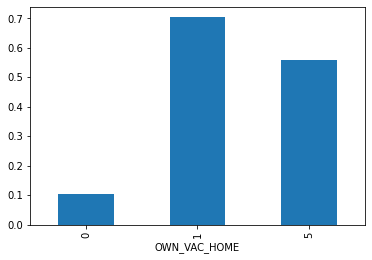

In [67]:
df1.groupby('OWN_VAC_HOME')['ONE_PERC'].mean().plot.bar()
plt.show()

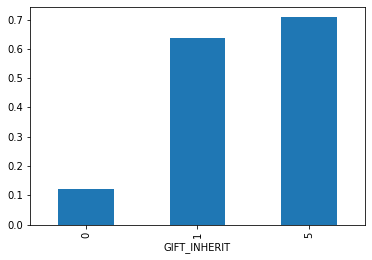

In [68]:
df1.groupby('GIFT_INHERIT')['ONE_PERC'].mean().plot.bar()
plt.show()

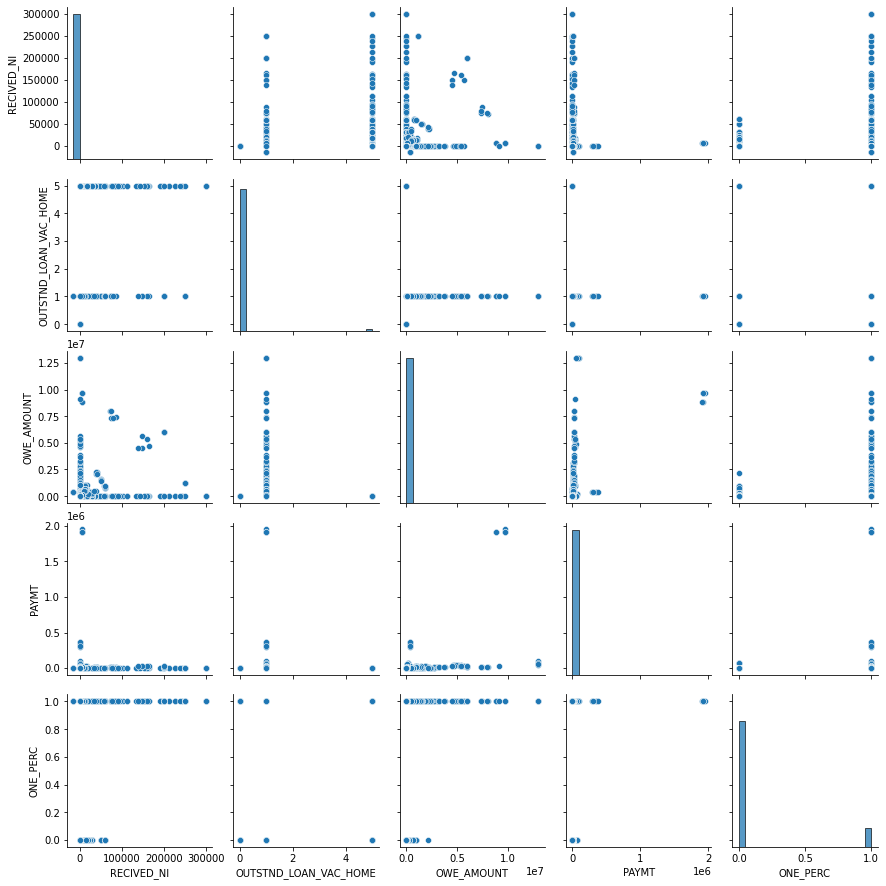

In [69]:
sns.pairplot(data = df1, vars=['RECIVED_NI',
       'OUTSTND_LOAN_VAC_HOME', 'OWE_AMOUNT', 'PAYMT','ONE_PERC'])
plt.show()

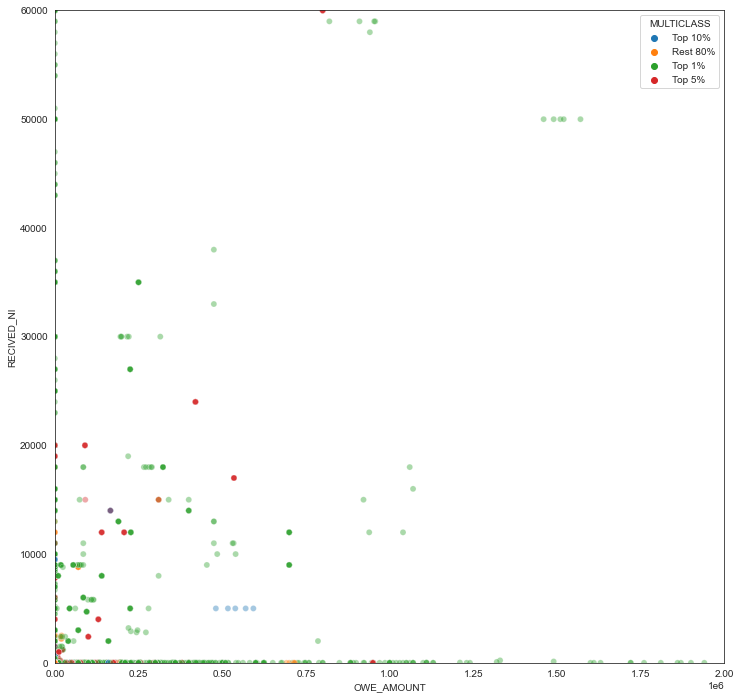

In [124]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df1, x="OWE_AMOUNT", y="RECIVED_NI", hue="MULTICLASS",alpha=0.4)
plt.xlim(0, 2000000)
plt.ylim(0, 60000)
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


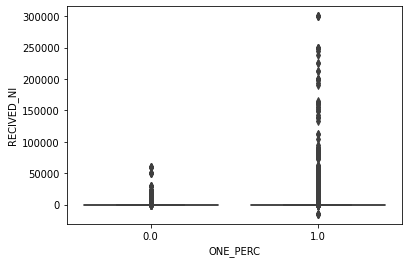

In [70]:
sns.boxplot(df1.ONE_PERC, df1.RECIVED_NI)
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


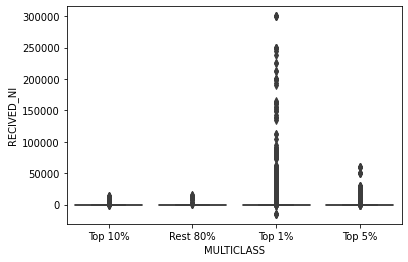

In [91]:
sns.boxplot(df1.MULTICLASS, df1.RECIVED_NI)
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


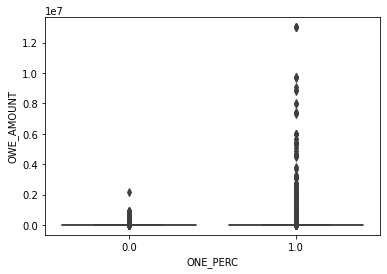

In [71]:
sns.boxplot(df1.ONE_PERC, df1.OWE_AMOUNT)
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


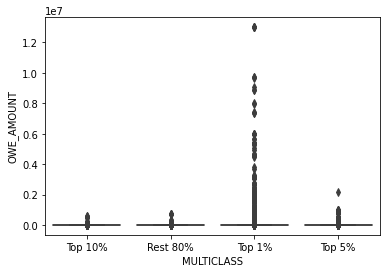

In [92]:
sns.boxplot(df1.MULTICLASS, df1.OWE_AMOUNT)
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


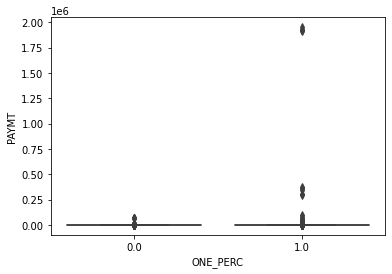

In [72]:
sns.boxplot(df1.ONE_PERC, df1.PAYMT)
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


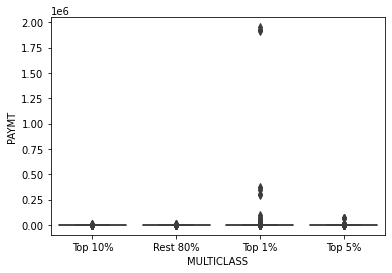

In [93]:
sns.boxplot(df1.MULTICLASS, df1.PAYMT)
plt.show()

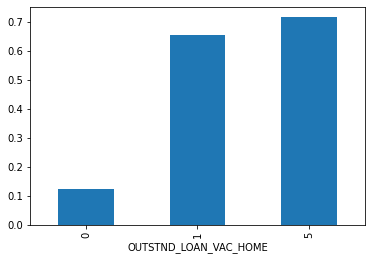

In [73]:

df1.groupby('OUTSTND_LOAN_VAC_HOME')['ONE_PERC'].mean().plot.bar()
plt.show()

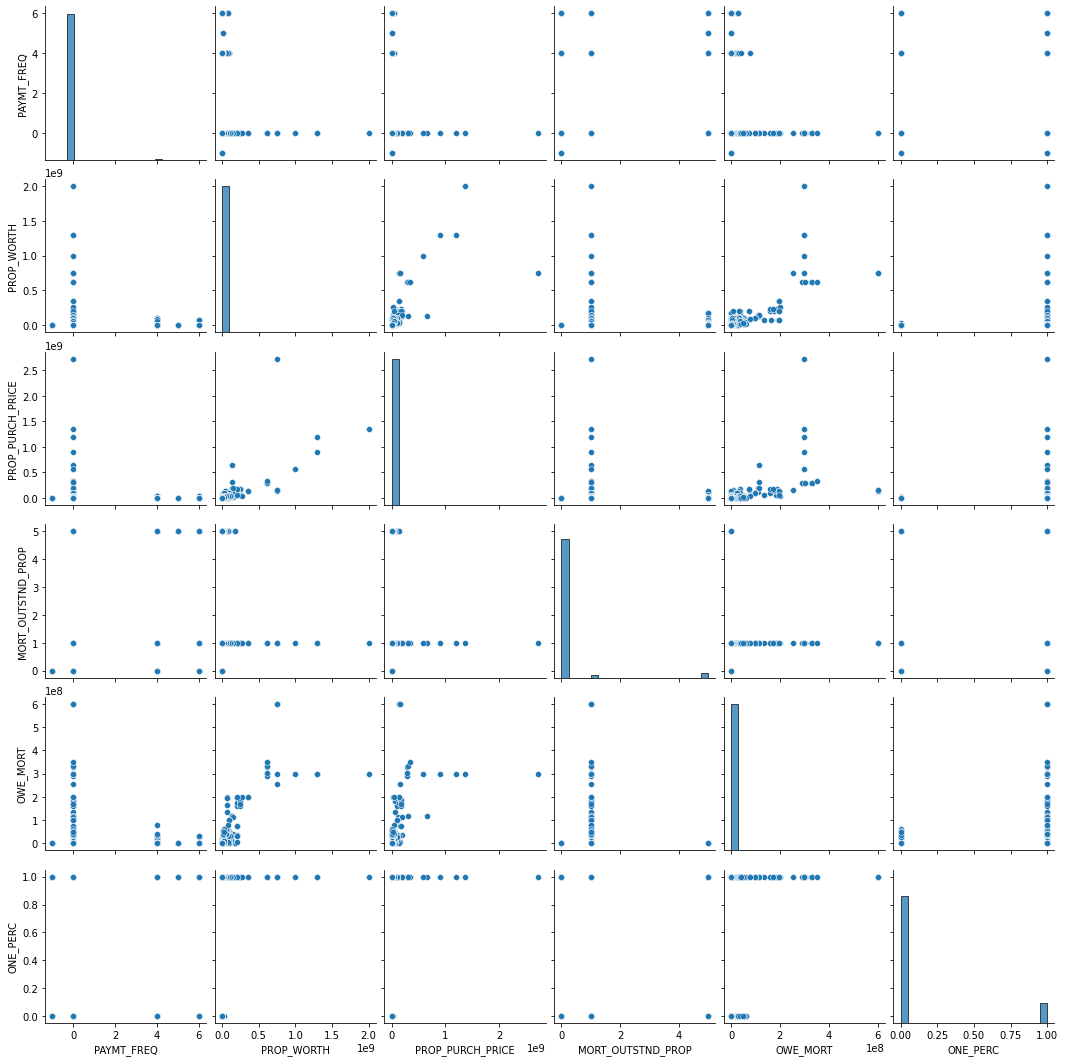

In [74]:
sns.pairplot(data = df1, vars=['PAYMT_FREQ',
       'PROP_WORTH', 'PROP_PURCH_PRICE', 'MORT_OUTSTND_PROP', 'OWE_MORT','ONE_PERC'])
plt.show()

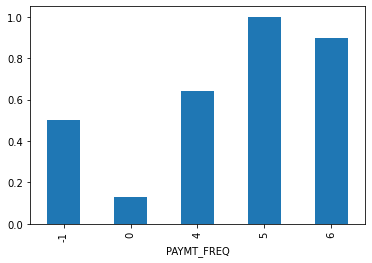

In [75]:

df1.groupby('PAYMT_FREQ')['ONE_PERC'].mean().plot.bar()
plt.show()

In [76]:
df1.groupby('MORT_OUTSTND_PROP')['ONE_PERC'].mean().plot.bar()
plt.show()